In [1]:
%matplotlib inline
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# 1. Implementación
Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors resultantes de observar 6 caras de 6 tiradas.

In [2]:
n = 6
obs = 6
obs_b = [1,1,1,1,1,1]
n_trace = 10000

with pm.Model() as modelo1:
    theta1 = pm.Beta('theta', alpha=1, beta=1)
    
    coin_obs1 = pm.Binomial('observadas', n=n, p=theta1, observed=obs)
    coin_throw1 = pm.Bernoulli('tirada', p=theta1, observed=obs_b)
    
    start1 = pm.find_MAP(model=modelo1, progressbar=False)
    step1 = pm.Metropolis()   
    trace1 = pm.sample(n_trace, step1, start1, progressbar=False)
    
with pm.Model() as modelo150:
    theta150 = pm.Beta('theta', alpha=150, beta=150)
    
    coin_throw150 = pm.Bernoulli('tirada', p=theta150, observed=obs_b)
    coin_obs150 = pm.Binomial('observadas', n=n, p=theta150, observed=obs)

    start150 = pm.find_MAP(model=modelo150, progressbar=False)
    step150 = pm.Metropolis()
    trace150 = pm.sample(n_trace, step150, start150, progressbar=False)

In [3]:
print "Modelo"
display(theta1), display(theta150)
display(coin_obs1)
display(coin_throw1)

Modelo


theta

theta

observadas

tirada

In [4]:
def mostrar_posterior(modelo, trace, alfa, beta):
    plt.clf()
    plt.hist(trace['theta'], 30, histtype='step', normed=True, label='post');
    x = np.linspace(0, 1, 100)
    plt.plot(x, stats.beta.pdf(x, alfa, beta), label='prior');
    plt.legend(loc='best');
    plt.show()
    
    return pm.find_MAP(model=modelo, progressbar=False)

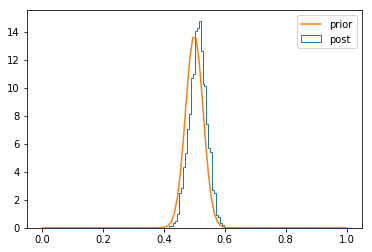

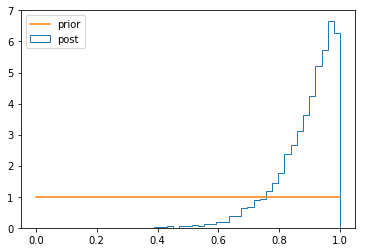

In [5]:
map_150_150 = mostrar_posterior(modelo150, trace150, 150, 150)
map_1_1 = mostrar_posterior(modelo1, trace1, 1, 1)

# 2. Resúmenes
Calcule el MAP (máximo a posteriori) y las medias de ambas posteriors.

Máximo a posteriori para prior Beta(1, 1): 0.999999231042
Posterior para prior Beta(1, 1)


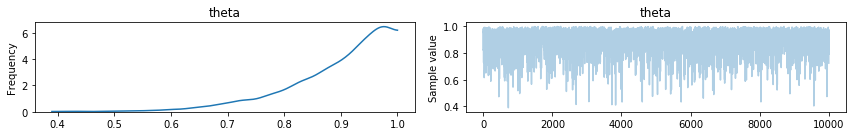



Máximo a posteriori para prior Beta(150, 150): 0.516618381428
Posterior para prior Beta(150, 150)


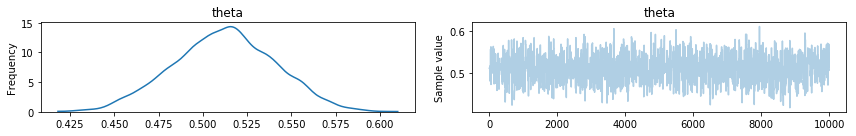

In [6]:
plt.clf()
print "Máximo a posteriori para prior Beta(1, 1): {}".format(map_1_1['theta'])
print "Posterior para prior Beta(1, 1)"
pm.traceplot(trace1)
plt.show()

print "\n\nMáximo a posteriori para prior Beta(150, 150): {}".format(map_150_150['theta'])
print "Posterior para prior Beta(150, 150)"
pm.traceplot(trace150)
plt.show()

### Estimando la media de las posteriors

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


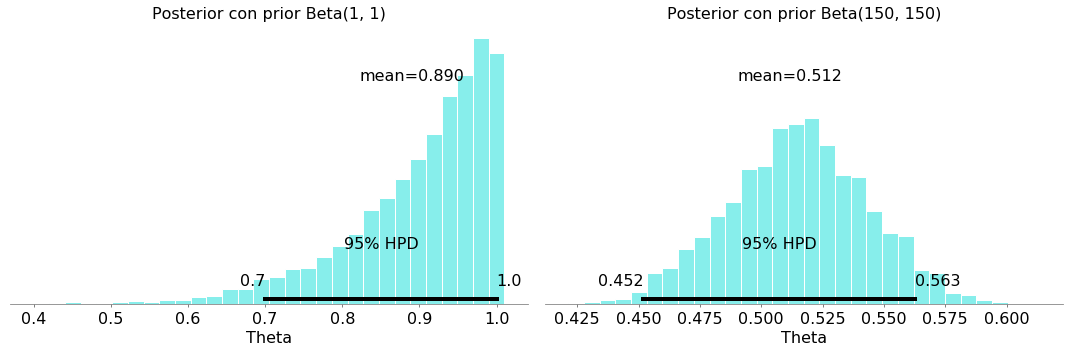

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)

pm.plot_posterior(trace1, color='#87eeeb', point_estimate='mean', ax=axes[0])
axes[0].set_title("Posterior con prior Beta(1, 1)", fontsize=16)
axes[0].set_xlabel("Theta", fontsize=16)

pm.plot_posterior(trace150, color='#87eeeb', point_estimate='mean', ax=axes[1])
axes[1].set_title("Posterior con prior Beta(150, 150)", fontsize=16)
axes[1].set_xlabel("Theta", fontsize=16)

fig.show()

# 3. Predicción
Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

In [8]:
ppc1 = pm.sample_ppc(trace1, samples=1, model=modelo1, size=10, progressbar=False)
ppc150 = pm.sample_ppc(trace150, samples=1, model=modelo150, size=10, progressbar=False)
print "Prediccion de 10 tiradas para (1,1): {}".format(ppc1['tirada'][0])
print "Prediccion de 10 tiradas para (150,150): {}".format(ppc150['tirada'][0])


Prediccion de 10 tiradas para (1,1): [1 1 0 1 1 1 1 1 1 1]
Prediccion de 10 tiradas para (150,150): [0 1 0 1 0 1 0 1 1 1]


# 4. Otros datos
Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas, y otra en
la que se observan 3 caras de 3 tiradas. ¿Qué puede concluir de los priors elegidos? ¿Y del modelo en
general?

## Modelo si observo 20 caras de 20 tiradas

In [9]:
obs_b = [1]*20

with pm.Model() as modelo1:
    theta1 = pm.Beta('theta', alpha=1, beta=1)
    
    coin_obs1 = pm.Binomial('observadas', n=20, p=theta1, observed=20)
    coin_throw1 = pm.Bernoulli('tirada', p=theta1, observed=obs_b)
    
    start1 = pm.find_MAP(model=modelo1, progressbar=False)
    step1 = pm.Metropolis()   
    trace1 = pm.sample(n_trace, step1, start1, progressbar=False)
    
with pm.Model() as modelo150:
    theta150 = pm.Beta('theta', alpha=150, beta=150)
    
    coin_throw150 = pm.Bernoulli('tirada', p=theta150, observed=obs_b)
    coin_obs150 = pm.Binomial('observadas', n=20, p=theta150, observed=20)

    start150 = pm.find_MAP(model=modelo150, progressbar=False)
    step150 = pm.Metropolis()
    trace150 = pm.sample(n_trace, step150, start150, progressbar=False)

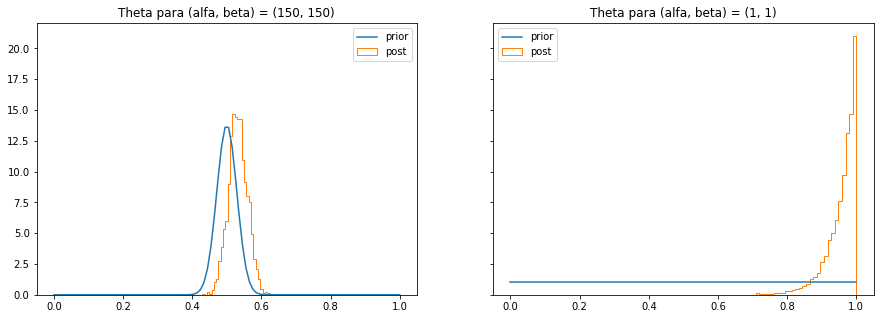

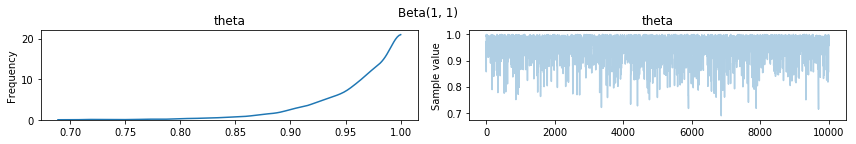

Máximo a posteriori para prior Beta(1, 1): 0.999999807761


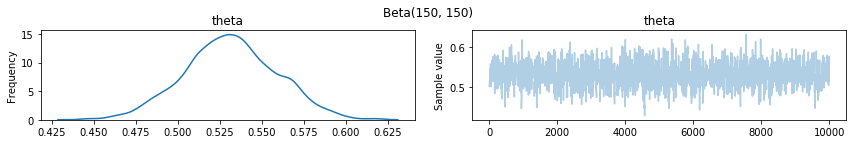

Máximo a posteriori para prior Beta(150, 150): 0.540863482479


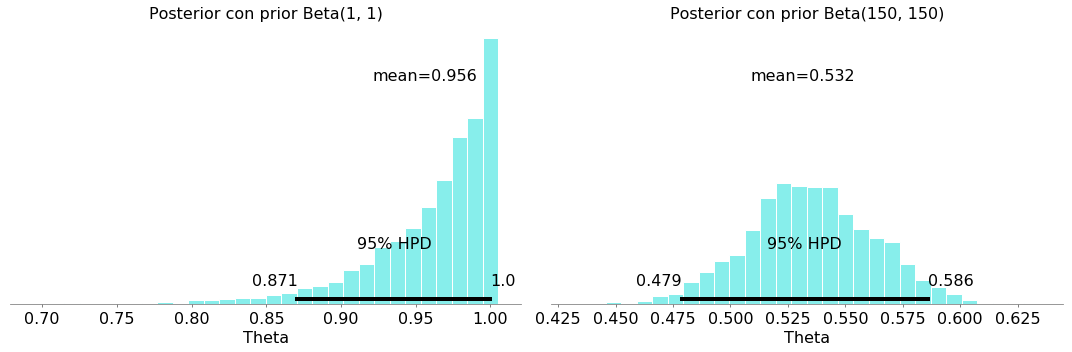

In [10]:
plt.clf()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)
x = np.linspace(0, 1, 100)

axes[0].plot(x, stats.beta.pdf(x, 150, 150), label='prior')
axes[0].hist(trace150['theta'], 30, histtype='step', normed=True, label='post')
axes[0].legend(loc='best')
axes[0].set_title('Theta para (alfa, beta) = (150, 150)')

axes[1].plot(x, stats.beta.pdf(x, 1, 1), label='prior')
axes[1].hist(trace1['theta'], 30, histtype='step', normed=True, label='post')
axes[1].legend(loc='upper left')
axes[1].set_title('Theta para (alfa, beta) = (1, 1)')
fig.show()

map_150_150 = pm.find_MAP(model=modelo150, progressbar=False)
map_1_1 = pm.find_MAP(model=modelo1, progressbar=False)

pm.traceplot(trace1)
plt.suptitle("Beta(1, 1)")
plt.show()
print "Máximo a posteriori para prior Beta(1, 1): {}".format(map_1_1['theta'])


pm.traceplot(trace150)
plt.suptitle("Beta(150, 150)")
plt.show()

print "Máximo a posteriori para prior Beta(150, 150): {}".format(map_150_150['theta'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)

pm.plot_posterior(trace1, color='#87eeeb', point_estimate='mean', ax=axes[0])
axes[0].set_title("Posterior con prior Beta(1, 1)", fontsize=16)
axes[0].set_xlabel("Theta", fontsize=16)

pm.plot_posterior(trace150, color='#87eeeb', point_estimate='mean', ax=axes[1])
axes[1].set_title("Posterior con prior Beta(150, 150)", fontsize=16)
axes[1].set_xlabel("Theta", fontsize=16)

fig.show()

### Predicciones del modelo

In [11]:
ppc1 = pm.sample_ppc(trace1, samples=1, model=modelo1, size=10, progressbar=False)
ppc150 = pm.sample_ppc(trace150, samples=1, model=modelo150, size=10, progressbar=False)
print "Prediccion de 10 tiradas para (1,1): {}".format(ppc1['tirada'][0])
print "Prediccion de 10 tiradas para (150,150): {}".format(ppc150['tirada'][0])


Prediccion de 10 tiradas para (1,1): [1 1 1 1 1 1 1 1 1 1]
Prediccion de 10 tiradas para (150,150): [0 1 1 0 0 0 0 1 0 0]


## Modelo si observo 3 caras de 3 tiradas

In [12]:
obs_b = [1]*3
with pm.Model() as modelo1:
    theta1 = pm.Beta('theta', alpha=1, beta=1)
    
    coin_obs1 = pm.Binomial('observadas', n=3, p=theta1, observed=3)
    coin_throw1 = pm.Bernoulli('tirada', p=theta1, observed=obs_b)
    
    start1 = pm.find_MAP(model=modelo1, progressbar=False)
    step1 = pm.Metropolis()   
    trace1 = pm.sample(n_trace, step1, start1, progressbar=False)
    
with pm.Model() as modelo150:
    theta150 = pm.Beta('theta', alpha=150, beta=150)
    
    coin_throw150 = pm.Bernoulli('tirada', p=theta150, observed=obs_b)
    coin_obs150 = pm.Binomial('observadas', n=3, p=theta150, observed=3)

    start150 = pm.find_MAP(model=modelo150, progressbar=False)
    step150 = pm.Metropolis()
    trace150 = pm.sample(n_trace, step150, start150, progressbar=False)

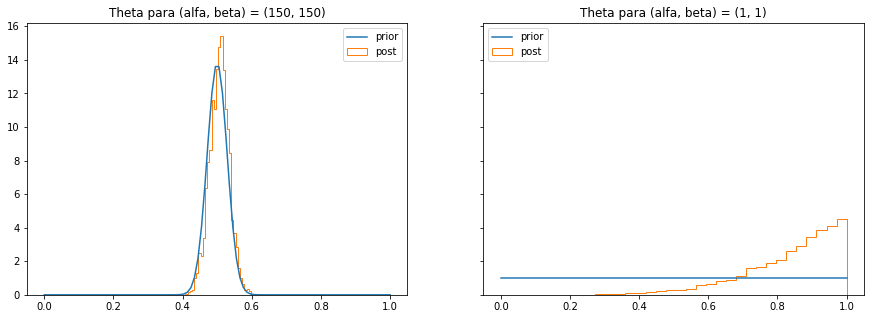

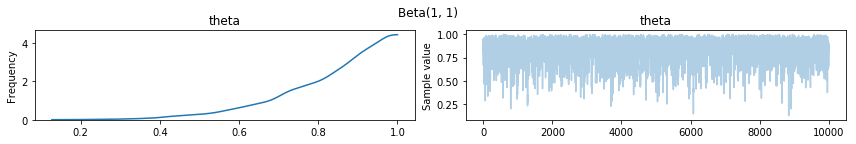

Máximo a posteriori para prior Beta(1, 1): 0.999998462083


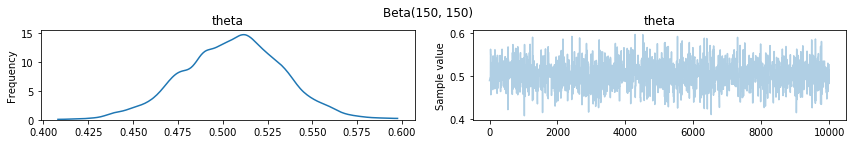

Máximo a posteriori para prior Beta(150, 150): 0.509068468161


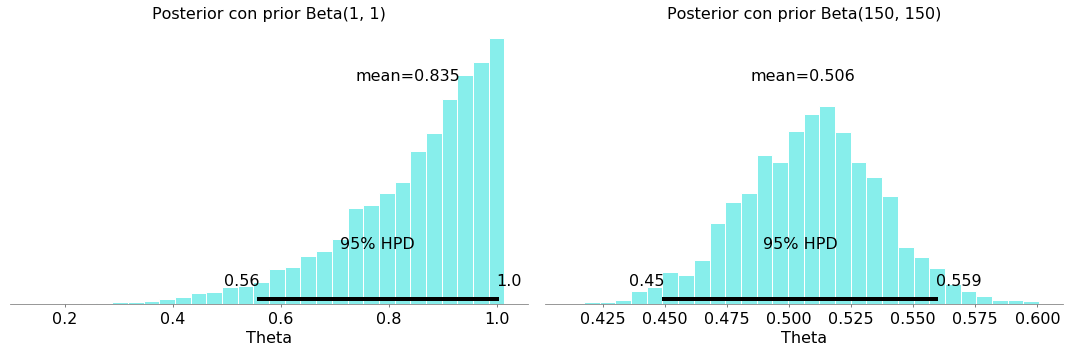

In [14]:
plt.clf()

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)
x = np.linspace(0, 1, 100)

axes[0].plot(x, stats.beta.pdf(x, 150, 150), label='prior')
axes[0].hist(trace150['theta'], 30, histtype='step', normed=True, label='post')
axes[0].legend(loc='best')
axes[0].set_title('Theta para (alfa, beta) = (150, 150)')

axes[1].plot(x, stats.beta.pdf(x, 1, 1), label='prior')
axes[1].hist(trace1['theta'], 30, histtype='step', normed=True, label='post')
axes[1].legend(loc='upper left')
axes[1].set_title('Theta para (alfa, beta) = (1, 1)')
fig.show()

map_150_150 = pm.find_MAP(model=modelo150, progressbar=False)
map_1_1 = pm.find_MAP(model=modelo1, progressbar=False)


map_150_150 = pm.find_MAP(model=modelo150, progressbar=False)
map_1_1 = pm.find_MAP(model=modelo1, progressbar=False)

pm.traceplot(trace1)
plt.suptitle("Beta(1, 1)")
plt.show()
print "Máximo a posteriori para prior Beta(1, 1): {}".format(map_1_1['theta'])


pm.traceplot(trace150)
plt.suptitle("Beta(150, 150)")
plt.show()

print "Máximo a posteriori para prior Beta(150, 150): {}".format(map_150_150['theta'])
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)

pm.plot_posterior(trace1, color='#87eeeb', point_estimate='mean', ax=axes[0])
axes[0].set_title("Posterior con prior Beta(1, 1)", fontsize=16)
axes[0].set_xlabel("Theta", fontsize=16)

pm.plot_posterior(trace150, color='#87eeeb', point_estimate='mean', ax=axes[1])
axes[1].set_title("Posterior con prior Beta(150, 150)", fontsize=16)
axes[1].set_xlabel("Theta", fontsize=16)

fig.show()

### Predicciones del modelo

In [15]:
ppc1 = pm.sample_ppc(trace1, samples=1, model=modelo1, size=10, progressbar=False)
ppc150 = pm.sample_ppc(trace150, samples=1, model=modelo150, size=10, progressbar=False)
print "Prediccion de 10 tiradas para (1,1): {}".format(ppc1['tirada'][0])
print "Prediccion de 10 tiradas para (150,150): {}".format(ppc150['tirada'][0])

Prediccion de 10 tiradas para (1,1): [1 0 1 1 1 1 0 1 1 1]
Prediccion de 10 tiradas para (150,150): [0 0 0 0 0 0 0 1 0 0]


# 5. Prior
Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar
que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros
de su prior Beta.